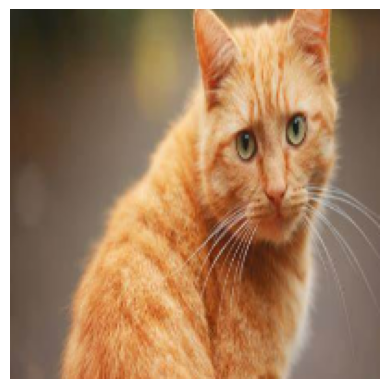

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread('./Screenshot 2025-06-10 110904.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
img = cv2.resize(img, (200, 200))   # Resize to (200, 200)

# Show image
plt.imshow(img)
plt.axis('off')  # Optional: hide axes
plt.show()


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation only on training data
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize
    rotation_range=40,           # Random rotation
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    shear_range=0.2,             # Shearing
    zoom_range=0.2,              # Zoom
    horizontal_flip=True,        # Horizontal flip
    fill_mode='nearest'          # Fill strategy
)

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(200, 200, 3)

In [5]:
img_batch=img.reshape(1,200,200,3)


In [6]:
# Load images from directory
i=0
for output in train_datagen.flow(img_batch,batch_size=1,save_to_dir='aug'):
    i+=1

    if i==10:
        break


# DATA AUGMENTATION--

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l1_l2


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
train_data = train_datagen.flow_from_directory(
    './dogs_vs_cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    './dogs_vs_cats/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='sigmoid')
])



In [22]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [25]:
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=1,
    validation_data=val_data,
    validation_steps=len(val_data)
)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.6712 - loss: 0.6016

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)

In [ ]:
model.evaluate(val_data)
model.save('cnn_model_with_augmentation.h5')
    

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
